# Lecture 7: Confidence Intervals
Description: Prof. Guttag continues discussing Monte Carlo simulations.

Instructor: John Guttag

Fraction within ~200 of mean = 95.4965


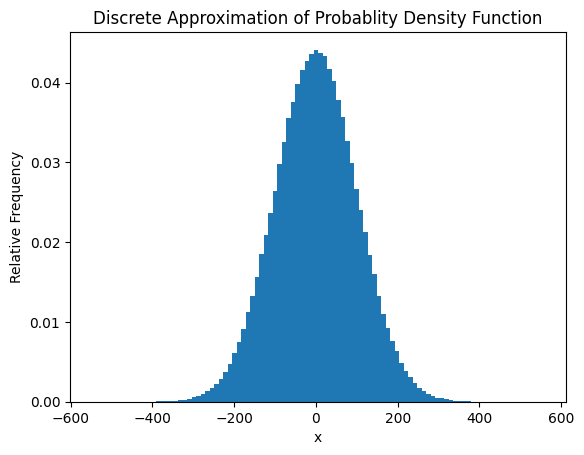

In [1]:
import random
import pylab

dist, num_samples = [], 1000000
for i in range(num_samples):
    dist.append(random.gauss(0, 100))

weights = [1/num_samples]*len(dist)
v = pylab.hist(dist, bins=100,
    weights=[1/num_samples]*len(dist))
pylab.xlabel('x')
pylab.ylabel('Relative Frequency')
pylab.title('Discrete Approximation of Probablity Density Function')
# Calculate the fraction of samples within ±200 of the mean
within_200 = [x for x in dist if -200 <= x <= 200]
fraction_within_200 = len(within_200) / num_samples * 100
print(f'Fraction within ~200 of mean = {fraction_within_200}')


### PDF for Normal Distribution

Text(0.5, 1.0, 'Normal Distribution mu = 0    sigma = 1')

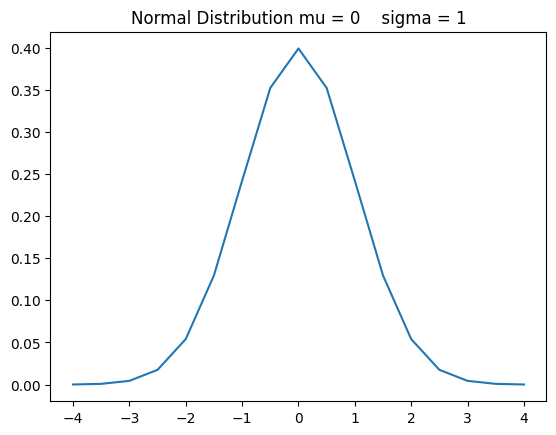

In [2]:
def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

x_val, y_val = [], []
mu, sigma = 0, 1
x = -4
while x <=4:
    x_val.append(x)
    y_val.append(gaussian(x, mu, sigma))
    x += 0.5

pylab.plot(x_val, y_val)
pylab.title(f'Normal Distribution mu = {str(mu)}\
    sigma = {str(sigma)}')


### Checking the Empirical Rule

In [9]:
import scipy.integrate

def check_empirical(num_trails):
    for t in range(num_trails):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print(f'For mu = {mu} and sigma = {sigma}')
        for num_std in (1, 1.96, 3):
            area = scipy.integrate.quad(gaussian,
                mu-num_std*sigma,
                mu+num_std*sigma,
                (mu, sigma))[0]
            print(f'Fraction within {num_std} std = {round(area, 4)}')

check_empirical(5)

For mu = 8 and sigma = 9
Fraction within 1 std = 0.6827
Fraction within 1.96 std = 0.95
Fraction within 3 std = 0.9973
For mu = -6 and sigma = 3
Fraction within 1 std = 0.6827
Fraction within 1.96 std = 0.95
Fraction within 3 std = 0.9973
For mu = -6 and sigma = 3
Fraction within 1 std = 0.6827
Fraction within 1.96 std = 0.95
Fraction within 3 std = 0.9973
For mu = 1 and sigma = 4
Fraction within 1 std = 0.6827
Fraction within 1.96 std = 0.95
Fraction within 3 std = 0.9973
For mu = 7 and sigma = 5
Fraction within 1 std = 0.6827
Fraction within 1.96 std = 0.95
Fraction within 3 std = 0.9973


### The Central Limit Theorem (CLT)
The Central Limit Theorem (CLT) is a fundamental concept in statistics that states:

**If you take a large enough sample size from any population with a finite mean and variance, the sampling distribution of the sample mean will approximate a normal distribution, regardless of the population's original distribution.**

Key points:
- The sample size should be sufficiently large (usually \( n \geq 30 \) is considered adequate).
- The mean of the sampling distribution will be equal to the population mean (\( \mu \)).
- The standard deviation of the sampling distribution (standard error) will be equal to the population standard deviation (\( \sigma \)) divided by the square root of the sample size (\( \sigma / \sqrt{n} \)).

The CLT is crucial because it allows us to make inferences about population parameters using the normal distribution, even if the original population is not normally distributed.

Mean of rolling 1 die = 2.4990925663330974 Std= 1.44280382735054
Mean of rolling 1 die = 2.4993210986140073 Std= 0.2035517404322452


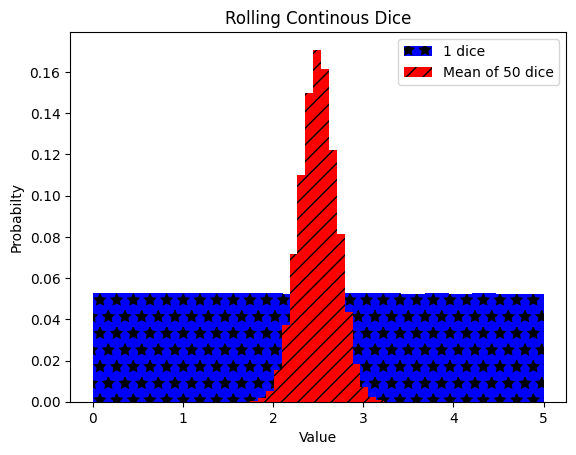

In [2]:
from lecture_code import plot_mean
mean, std = plot_mean(1, 1000000, 19, '1 dice','b','*')
print(f'Mean of rolling 1 die = {str(mean)} Std= {std}')
mean, std = plot_mean(50, 1000000, 19, 'Mean of 50 dice','r','//')
print(f'Mean of rolling 1 die = {str(mean)} Std= {std}')


Simulating Buffon-Laplas Method

In [1]:
from lecture_code import est_pi

est_pi(0.005, 100)

NameError: name 'std_dev' is not defined